In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np 
from numba import jit
from numpy import sin, pi
from pathlib import Path

%reload_ext autoreload
%aimport visualization
%aimport species_transport
%aimport parameters
from parameters import *
from fluid_flow import dt_fluid_flow
from visualization import plot_species_overview, plot_velocity_vector_field
from species_transport import evolve_species, set_up_T, load_Y_T

In [2]:
N = 50
dx, dy, Ns_c, Nc_lw = parameters.set_resolution(N,N)
dt = dt_fluid_flow(dx, Fo=0.3)

re-load velocity, species and temperature fields

In [3]:
# load the velocity field:
data_vel = Path('data/vel_field/test0') / 'UVP_N{}.npy'.format(N)
u,v,_ = np.load(data_vel)
#plot_velocity_vector_field(u,v)

In [4]:
data_sp = Path('data/species_ignited/test0') / 'N{}.npy'.format(N)
species_data = np.load(data_sp)
Y,T = load_Y_T(data_sp)
#T = set_up_T(N,M,dy,smooth=False)

#fig, axs = plt.subplots(2, 4, figsize=(7,5.),sharex=True, sharey=True)
#plot_species_overview(Y,T, axs=axs)

Once the ignition has stabilized, add the temperature evolution:

In [5]:
from species_transport import get_dt_chem
Nt = 200
dt_chem = get_dt_chem(N)
print(dt / dt_chem, dt_chem)

288.13083906149444 1.1564000000000001e-07


In [14]:
%time Y, T = evolve_species(Nt, Y, T, dt, u, v, dx, dy, Ns_c, Nc_lw, chem=True, dt_chem=dt_chem, evolve_T=True);

CPU times: user 5.91 s, sys: 2.45 ms, total: 5.91 s
Wall time: 5.9 s


We see a hot spot is created in the middle of the chamber (we still need to find the stationnary state).

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
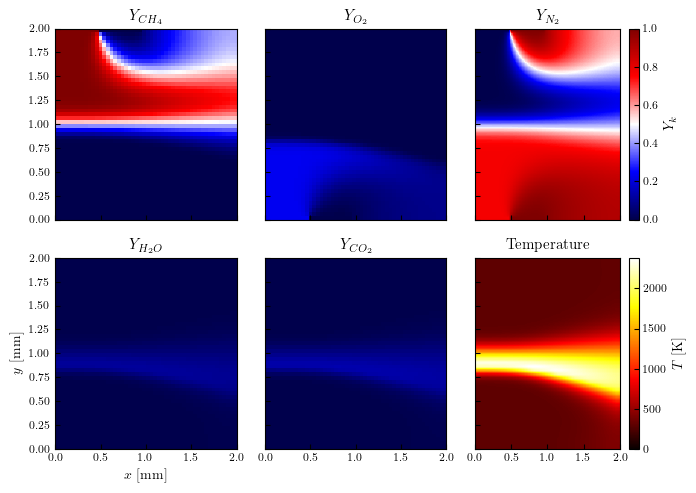

In [13]:
%autoreload 1
fig, axs =plt.subplots(2, 3, figsize=(7,5.),sharex=True, sharey=True)
plot_species_overview(Y,T, axs=axs)

Figure for the presentation

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
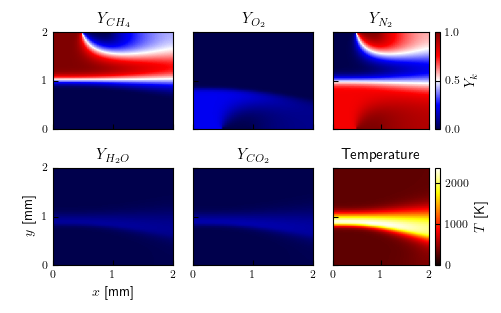

In [15]:
from visualization import plot_species_overview
%autoreload 1
if False:
    from plotting import set_size
    plt.style.use('tex.mplstyle')
    figsize = set_size(fraction=0.8, aspect_r=0.5)
    
    fig, axs = plt.subplots(2, 3, figsize=figsize,sharex=True, sharey=True)
    plot_species_overview(Y,T, axs=axs)
    plt.tight_layout()
    fig.savefig('figures/combustion_with_T_overview.svg')
    plt.style.use('default')
    